<a href="https://colab.research.google.com/github/Delcapa/BDA_6th/blob/main/Feature(230806).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 필수과제1
* 데이터 전처리를 진행하고, 실제 모델링을 진행하여 예측값을 확인하고 비교할 예정
* accuracy 이외에도 f1 스코어도 보면서 어떤 식으로 전처리 결과가 나오는지 확인할 예정


### [ 필수과제 데이터 공유 ]

#### 구글드라이브 업로드 완료 - zomato_dataset.csv (출처 - Kaggle)
#### price(y값) 예측, 회귀분석 모델링 예정

#### 컬럼 설명
* Restaurant Name: This column contains the name of the restaurant to which the menu items and other details belong.

* Dining Rating: The "Dining Rating" column represents the average rating received by the restaurant for its dining experience. The rating is typically provided by customers who have dined at the restaurant and shared their feedback or reviews.

* Delivery Rating: The "Delivery Rating" column indicates the average rating received by the restaurant for its delivery service. This rating is based on customers' experiences with the restaurant's food delivery service.

* Dining Votes: This column shows the total number of votes or reviews received for the dining experience at the restaurant. Customers often rate their dining experiences by providing feedback or votes, which are used to calculate the average dining rating.

* Delivery Votes: The "Delivery Votes" column displays the total number of votes or reviews received for the delivery service provided by the restaurant. This column may contain "0" if delivery ratings are not applicable or unavailable.

* TAG: The "TAG" column contains a label or category assigned to each food item. It helps identify the type or category of food items offered by the restaurant.

* Place Name: This column provides the location or area where the restaurant is situated.

* City: The "City" column specifies the city in which the restaurant is located.

* Item Name: The "Item Name" column lists the name of the food items available at the restaurant. It includes various dishes and meals offered by the restaurant.

* Best Seller: The "Best Seller" column indicates whether a particular food item is a bestseller or not. It helps identify popular items among customers.

* Votes: The "Votes" column represents the total number of votes or reviews received for a specific food item. Customers may provide feedback or ratings for individual food items.

* Prices: This column displays the price of each food item. It shows the cost of each dish or meal offered by the restaurant.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
zomato = pd.read_csv("/content/drive/MyDrive/zomato_dataset.csv")
zomato

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0


In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant_Name  123657 non-null  object 
 1   Dining_Rating    91421 non-null   float64
 2   Delivery_Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery_Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place_Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item_Name        123657 non-null  object 
 9   Best_Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [ ]:
zomato.isna().sum()
# Dining_Rating, Delivery_Rating, Best_Seller 컬럼들이 결측치를 가짐

Restaurant_Name        0
Dining_Rating      32236
Delivery_Rating     1280
Dining Votes           0
Delivery_Votes         0
Cuisine                0
Place_Name             0
City                   0
Item_Name              0
Best_Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [ ]:
#전처리 진행
zomato.columns

Index(['Restaurant_Name', 'Dining_Rating', 'Delivery_Rating', 'Dining Votes',
       'Delivery_Votes', 'Cuisine ', 'Place_Name', 'City', 'Item_Name',
       'Best_Seller', 'Votes', 'Prices'],
      dtype='object')

<Axes: xlabel='Votes', ylabel='Prices'>

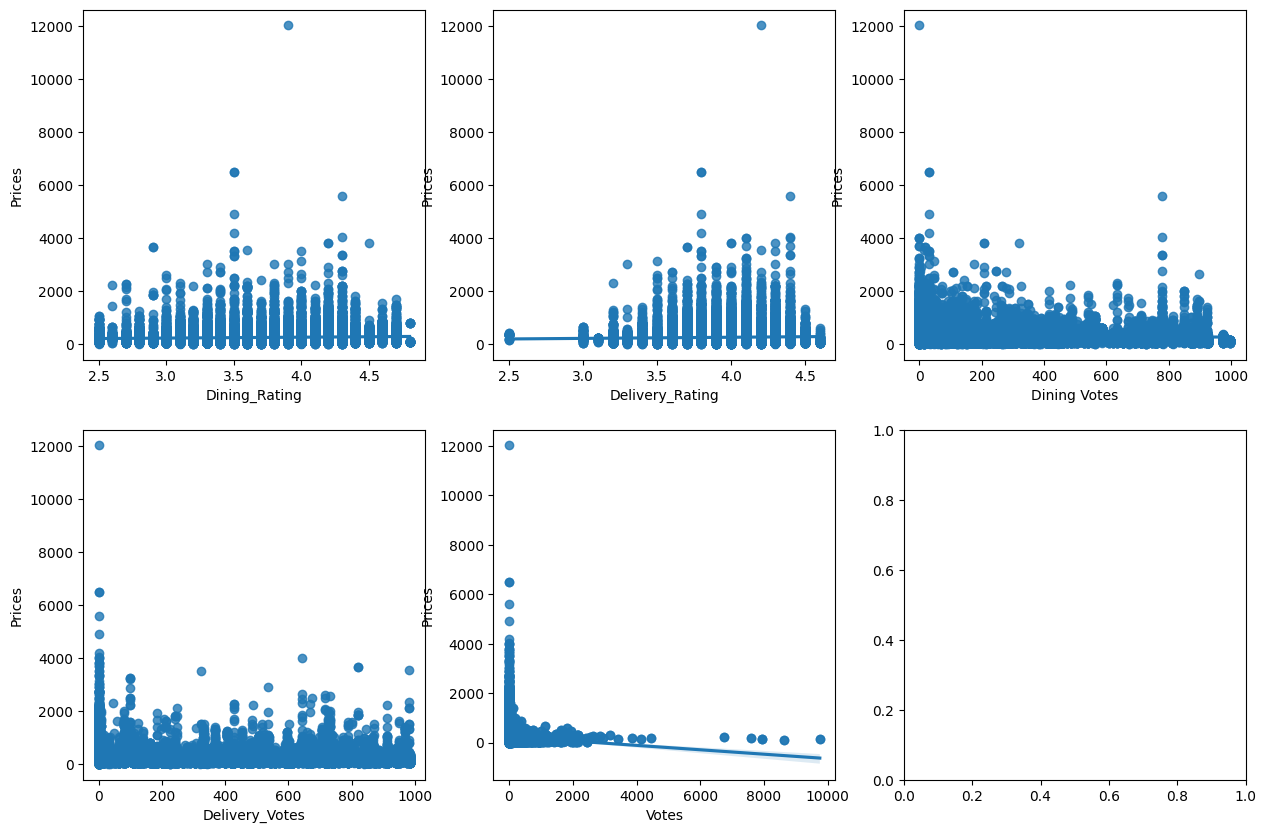

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize = (15,10))


sns.regplot(x="Dining_Rating", y="Prices", data = zomato, ax=ax[0,0])
sns.regplot(x='Delivery_Rating', y="Prices", data = zomato, ax=ax[0,1])
sns.regplot(x='Dining Votes', y="Prices", data = zomato, ax=ax[0,2])
sns.regplot(x='Delivery_Votes', y="Prices", data = zomato, ax=ax[1,0])
sns.regplot(x='Votes', y="Prices", data = zomato, ax=ax[1,1])
# prices와 수치형 값들은 큰 관계가 없어보임

<Axes: xlabel='Votes', ylabel='Prices'>

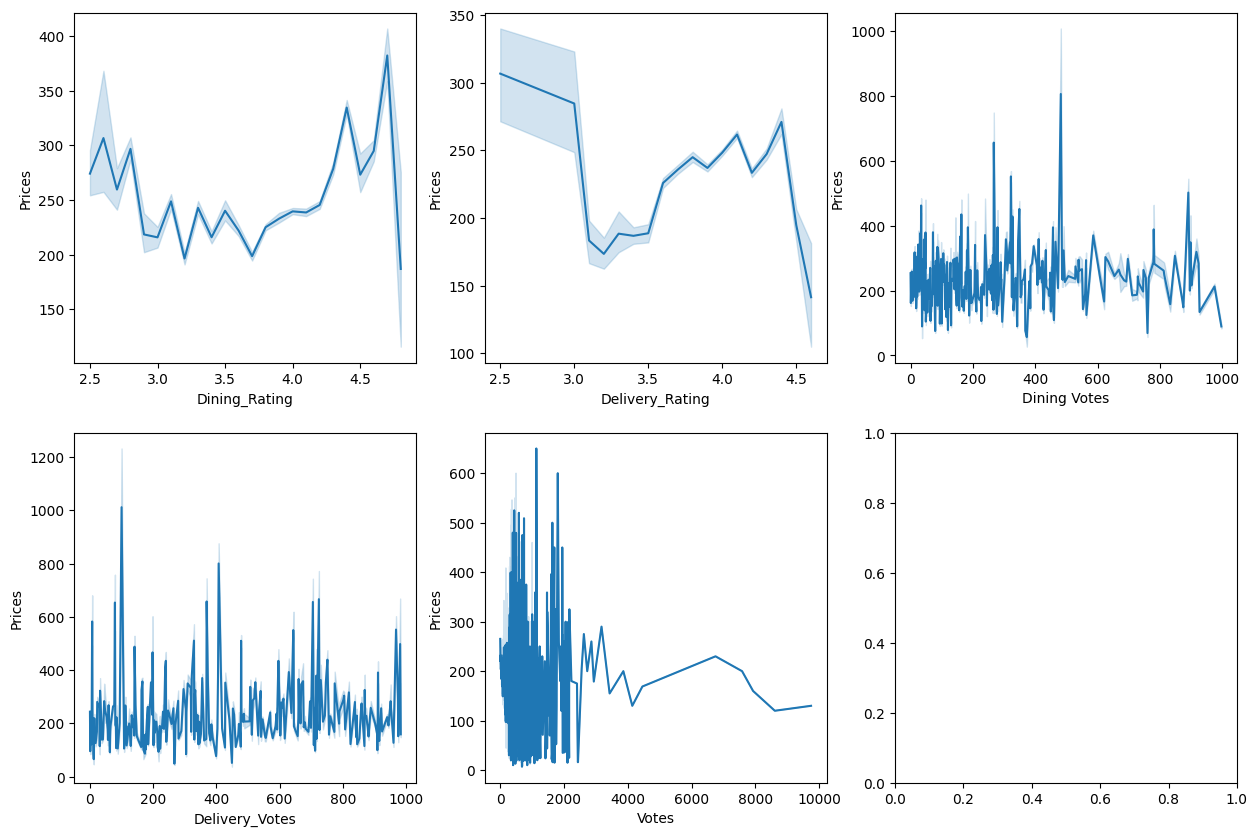

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize = (15,10))


sns.lineplot(x="Dining_Rating", y="Prices", data = zomato, ax=ax[0,0])
sns.lineplot(x='Delivery_Rating', y="Prices", data = zomato, ax=ax[0,1])
sns.lineplot(x='Dining Votes', y="Prices", data = zomato, ax=ax[0,2])
sns.lineplot(x='Delivery_Votes', y="Prices", data = zomato, ax=ax[1,0])
sns.lineplot(x='Votes', y="Prices", data = zomato, ax=ax[1,1])
# prices와 수치형 값들은 큰 관계가 없어보임

Text(0.5, 0, 'Price')

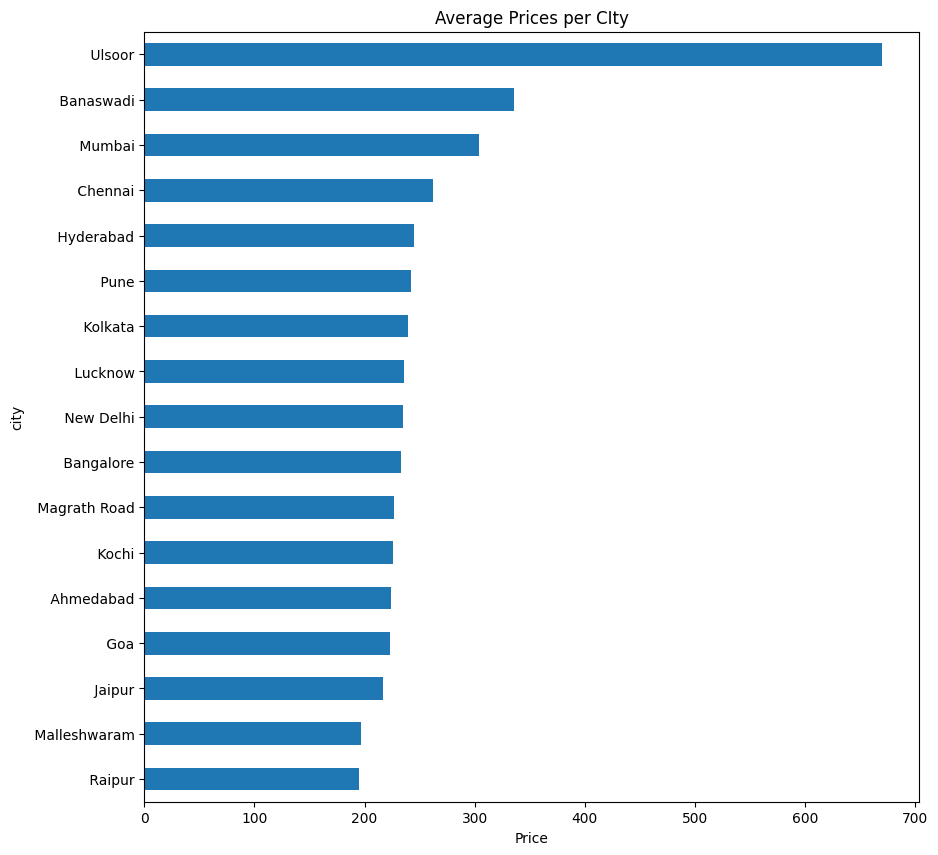

In [ ]:
a1 = zomato.groupby("City")["Prices"].mean().sort_values(ascending=True)
a1.plot(kind="barh", figsize = (10,10))

plt.title("Average Prices per CIty")
plt.ylabel("city")
plt.xlabel("Price")
# city에 따라 평균 prices에 차이가 있음을 확인

Text(0.5, 0, 'Price')

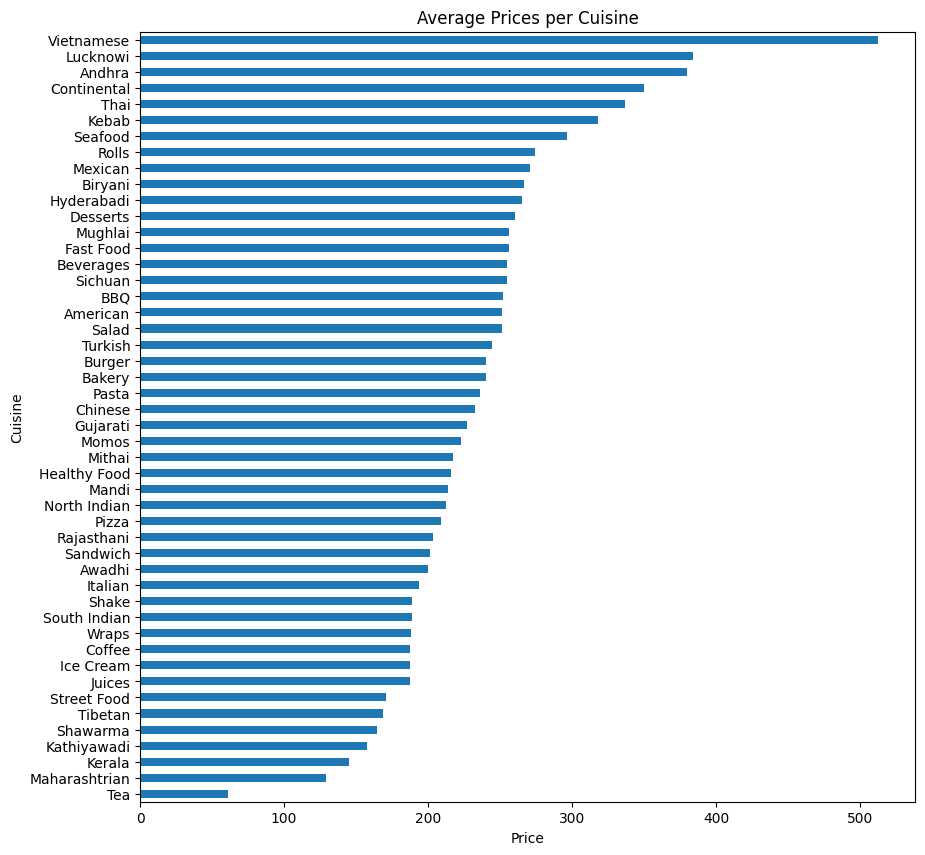

In [ ]:
a2 = zomato.groupby("Cuisine ")["Prices"].mean().sort_values(ascending=True)
a2.plot(kind="barh", figsize = (10,10))

plt.title("Average Prices per Cuisine")
plt.ylabel("Cuisine")
plt.xlabel("Price")
# cuisine에 따라 평균 prices에 차이가 있음을 확인

Text(0.5, 0, 'Price')

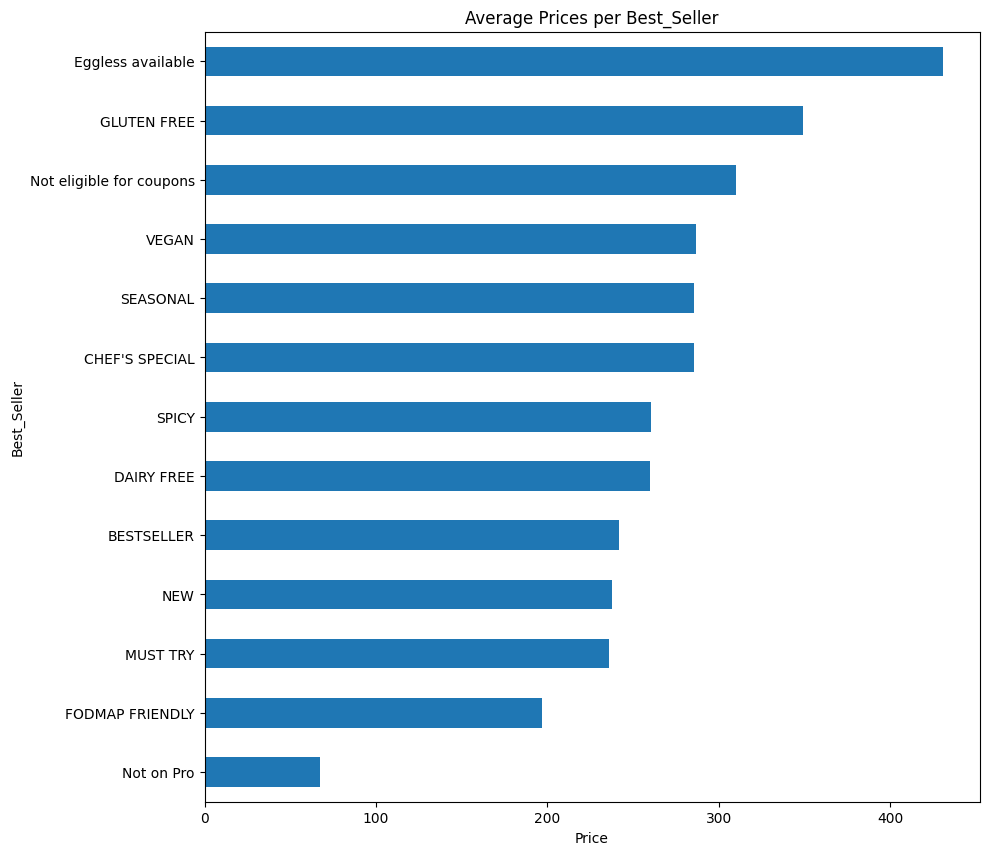

In [ ]:
a3 = zomato.groupby("Best_Seller")["Prices"].mean().sort_values(ascending=True)
a3.plot(kind="barh", figsize = (10,10))

plt.title("Average Prices per Best_Seller")
plt.ylabel("Best_Seller")
plt.xlabel("Price")
# best_seller에 따라 평균 prices에 차이가 있음을 확인

In [ ]:
df_zomato1 = zomato[["City","Cuisine ","Best_Seller", "Prices"]] #영향을 주는 x열과 종속변수 y열만 추출
df_zomato1

,City,Cuisine,Best_Seller,Prices
0,Hyderabad,Fast Food,BESTSELLER,249.0
1,Hyderabad,Fast Food,BESTSELLER,129.0
2,Hyderabad,Fast Food,NaN,189.0
3,Hyderabad,Fast Food,BESTSELLER,189.0
4,Hyderabad,Fast Food,MUST TRY,205.0
...,...,...,...,...
123652,Raipur,Pizza,NaN,525.0
123653,Raipur,Pizza,NaN,525.0
123654,Raipur,Pizza,NaN,525.0
123655,Raipur,Pizza,NaN,525.0


In [ ]:
df_zomato2 = df_zomato1[["City","Cuisine ","Best_Seller"]]
df_zomato2

,City,Cuisine,Best_Seller
0,Hyderabad,Fast Food,BESTSELLER
1,Hyderabad,Fast Food,BESTSELLER
2,Hyderabad,Fast Food,NaN
3,Hyderabad,Fast Food,BESTSELLER
4,Hyderabad,Fast Food,MUST TRY
...,...,...,...
123652,Raipur,Pizza,NaN
123653,Raipur,Pizza,NaN
123654,Raipur,Pizza,NaN
123655,Raipur,Pizza,NaN


In [ ]:
df_zomato3 = pd.get_dummies(df_zomato2)
df_zomato3

,City_ Ahmedabad,City_ Banaswadi,City_ Bangalore,City_ Chennai,City_ Goa,City_ Hyderabad,City_ Jaipur,City_ Kochi,City_ Kolkata,City_ Lucknow,...,Best_Seller_Eggless available,Best_Seller_FODMAP FRIENDLY,Best_Seller_GLUTEN FREE,Best_Seller_MUST TRY,Best_Seller_NEW,Best_Seller_Not eligible for coupons,Best_Seller_Not on Pro,Best_Seller_SEASONAL,Best_Seller_SPICY,Best_Seller_VEGAN
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_zomato = pd.concat([df_zomato1,df_zomato3], axis = 1)
df_zomato.drop(["City","Cuisine ","Best_Seller"], axis=1, inplace = True)
df_zomato

,Prices,City_ Ahmedabad,City_ Banaswadi,City_ Bangalore,City_ Chennai,City_ Goa,City_ Hyderabad,City_ Jaipur,City_ Kochi,City_ Kolkata,...,Best_Seller_Eggless available,Best_Seller_FODMAP FRIENDLY,Best_Seller_GLUTEN FREE,Best_Seller_MUST TRY,Best_Seller_NEW,Best_Seller_Not eligible for coupons,Best_Seller_Not on Pro,Best_Seller_SEASONAL,Best_Seller_SPICY,Best_Seller_VEGAN
0,249.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,129.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,189.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,189.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,205.0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,525.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123653,525.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123654,525.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123655,525.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 79 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Prices                                123657 non-null  float64
 1   City_ Ahmedabad                       123657 non-null  uint8  
 2   City_ Banaswadi                       123657 non-null  uint8  
 3   City_ Bangalore                       123657 non-null  uint8  
 4   City_ Chennai                         123657 non-null  uint8  
 5   City_ Goa                             123657 non-null  uint8  
 6   City_ Hyderabad                       123657 non-null  uint8  
 7   City_ Jaipur                          123657 non-null  uint8  
 8   City_ Kochi                           123657 non-null  uint8  
 9   City_ Kolkata                         123657 non-null  uint8  
 10  City_ Lucknow                         123657 non-null  uint8  
 11  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_zomato.drop("Prices", axis=1), df_zomato["Prices"],
                                                    test_size = 0.2, random_state = 111)
# x값(독립변수)에는 Prices를 제외한 값을, y값(종속변수)에는 Prices값을 넣어줌

In [ ]:
#선형회귀모델 가정 확인
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis = 1)
# OLS : 가장 기본적인 결정론적 선형 회귀 방법. 잔차제곱합(RSS)를 최소화하는 가중치를 구하는 방법
# model = sm.OLS(y, x)를 통해 모델 선언
model_trained = model.fit()
# model_trained = model.fit()을 통해 모델 학습

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


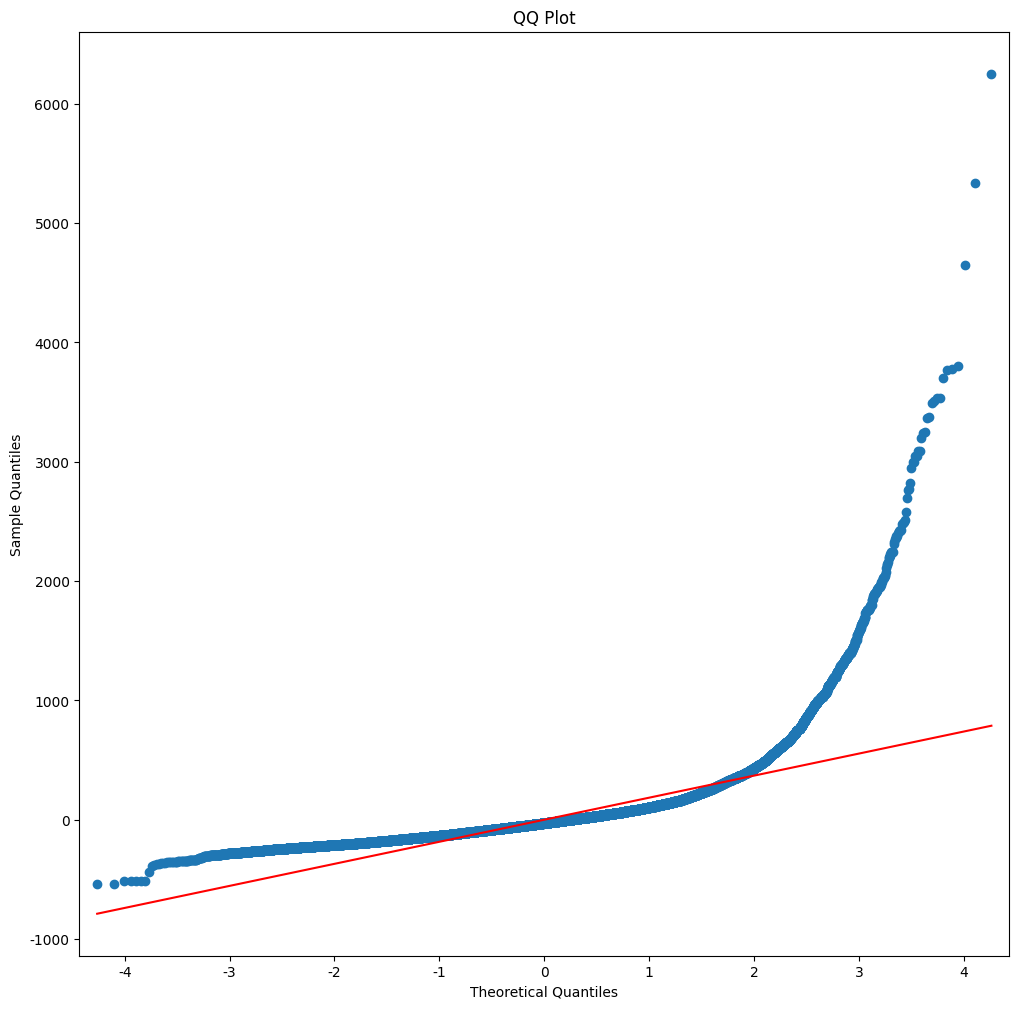

In [ ]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line = 's', color = "red", ax = ax)
ax.title.set_text('QQ Plot')

#qq plot상으로는 빨간 실선에 유사함을 확인 가능

In [ ]:
print(model_trained.summary())
# p>|t|가 0.05(유의수준) 이하여야 변수가 의미가 있음
# 해당안되는 변수들은 제거(아래의 변수들)
# "City_ Chennai", "City_ Kolkata", "City_ Lucknow", "City_ Magrath Road", "City_ Malleshwaram"
# "Cuisine _Awadhi", "Cuisine _Burger", "Cuisine _Chinese", "Cuisine _Gujarati", "Cuisine _Mandi"
# "Cuisine _Mexican", "Cuisine _Mithai", "Cuisine _Momos", "Cuisine _Pasta", "Cuisine _Salad", "Cuisine _Thai"
# "Cuisine _Turkish", "Cuisine _Vietnamese", "Best_Seller_DAIRY FREE", "Best_Seller_FODMAP FRIENDLY"
# "Best_Seller_GLUTEN FREE", "Best_Seller_MUST TRY", "Best_Seller_NEW", "Best_Seller_VEGAN"

                            OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     66.91
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:11:48   Log-Likelihood:            -6.5669e+05
No. Observations:               98925   AIC:                         1.314e+06
Df Residuals:                   98848   BIC:                         1.314e+06
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
model = sm.OLS(y_train, X_train.drop(["City_ Chennai", "City_ Kolkata", "City_ Lucknow", "City_ Magrath Road", "City_ Malleshwaram",
                                      "Cuisine _Awadhi", "Cuisine _Burger", "Cuisine _Chinese", "Cuisine _Gujarati", "Cuisine _Mandi",
                                      "Cuisine _Mexican", "Cuisine _Mithai", "Cuisine _Momos", "Cuisine _Pasta", "Cuisine _Salad", "Cuisine _Thai",
                                      "Cuisine _Turkish", "Cuisine _Vietnamese", "Best_Seller_DAIRY FREE", "Best_Seller_FODMAP FRIENDLY",
                                      "Best_Seller_GLUTEN FREE", "Best_Seller_MUST TRY", "Best_Seller_NEW", "Best_Seller_VEGAN"], axis = 1))
model_trained = model.fit()
print(model_trained.summary())
# 0.05 이하의 p값이 나온 변수들을 제거한 모델로 다시 구축

                            OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     93.45
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:17:47   Log-Likelihood:            -6.5671e+05
No. Observations:               98925   AIC:                         1.314e+06
Df Residuals:                   98870   BIC:                         1.314e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


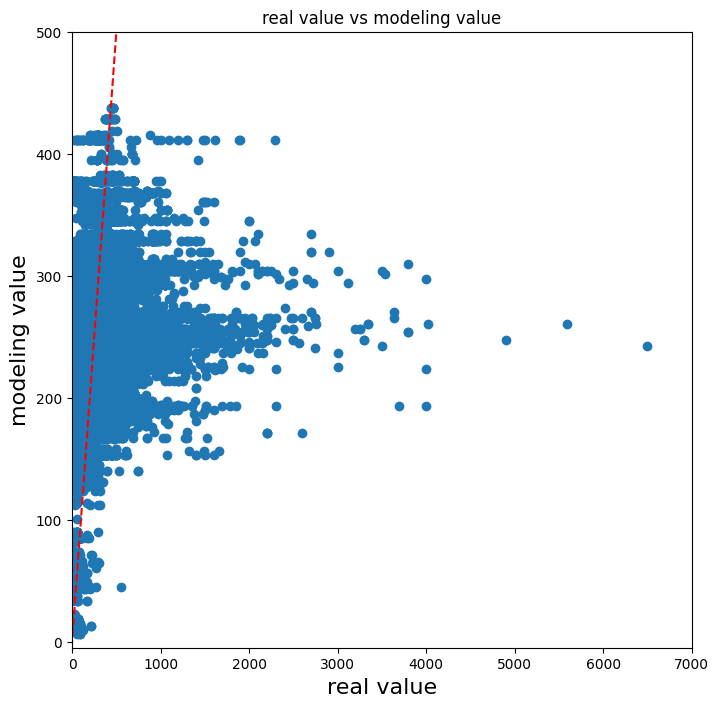

In [ ]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize = (8,8))
plt.title('real value vs modeling value')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 700], [-5, 700], ls = '--', c = 'red')
plt.xlabel('real value', size = 16)
plt.ylabel('modeling value', size = 16)
plt.xlim(-5, 7000)
plt.ylim(-5, 500)
plt.show()
# 어느정도 값들이 빨간 선을 따라 예측됨

In [ ]:
df = df_zomato.drop(["City_ Chennai", "City_ Kolkata", "City_ Lucknow", "City_ Magrath Road", "City_ Malleshwaram",
                                      "Cuisine _Awadhi", "Cuisine _Burger", "Cuisine _Chinese", "Cuisine _Gujarati", "Cuisine _Mandi",
                                      "Cuisine _Mexican", "Cuisine _Mithai", "Cuisine _Momos", "Cuisine _Pasta", "Cuisine _Salad", "Cuisine _Thai",
                                      "Cuisine _Turkish", "Cuisine _Vietnamese", "Best_Seller_DAIRY FREE", "Best_Seller_FODMAP FRIENDLY",
                                      "Best_Seller_GLUTEN FREE", "Best_Seller_MUST TRY", "Best_Seller_NEW", "Best_Seller_VEGAN"], axis = 1)
df

,Prices,City_ Ahmedabad,City_ Banaswadi,City_ Bangalore,City_ Goa,City_ Hyderabad,City_ Jaipur,City_ Kochi,City_ Mumbai,City_ New Delhi,...,Cuisine _Tea,Cuisine _Tibetan,Cuisine _Wraps,Best_Seller_BESTSELLER,Best_Seller_CHEF'S SPECIAL,Best_Seller_Eggless available,Best_Seller_Not eligible for coupons,Best_Seller_Not on Pro,Best_Seller_SEASONAL,Best_Seller_SPICY
0,249.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,129.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,189.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,189.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,205.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,525.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123653,525.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123654,525.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123655,525.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv('/content/drive/MyDrive/reg_zomato.csv', index = False)